<a href="https://colab.research.google.com/github/vaidande/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Capstone_Project_by_Ritik_Vaidande.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

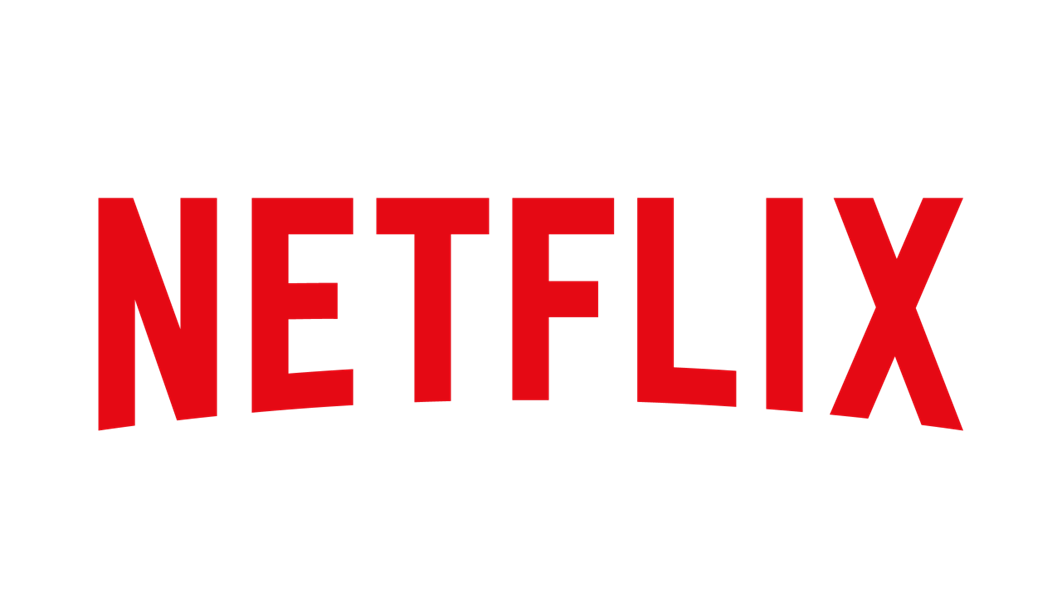

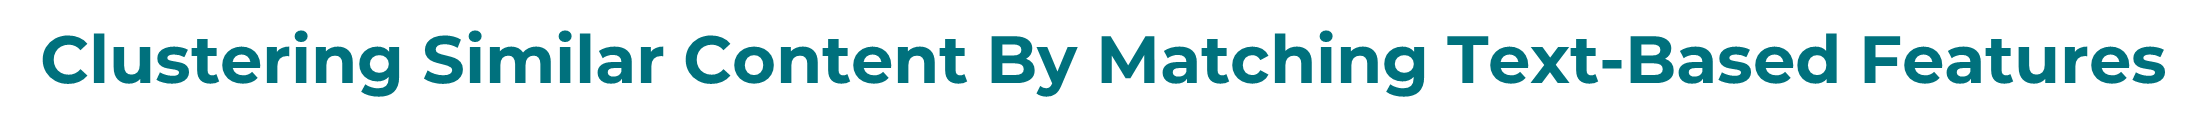

#Importing Libraries

In [ ]:
# installing required library
! pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 7.7 MB/s 
     |████████████████████████████████| 1.1 MB 72.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=77fed2b8fb782aee691680a098e7ede075d4b17aff0043c92f5026b409d63ce6
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55512 sha256=8883abb553692dc83f4ffa87c97a4cd42a7d2101472e8b0223296d1ebbb6177e
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent


In [ ]:
# import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
import scipy.cluster.hierarchy as sch
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import AgglomerativeClustering

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# Mounting GDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Data Loading and Cleaning

In [ ]:
# Loading dataset
file_path = '/content/gdrive/MyDrive/Datasets/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(file_path)

In [ ]:
# checking dataset shape
df.shape

(7787, 12)

In [ ]:
# first 5 rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# last 5 rows of the dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# dataset description
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [ ]:
# checking for duplicate values
df.duplicated().sum()

0

In [ ]:
# checking for null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# replacing missing values by 'Not Mentioned'
df['cast'].fillna(value='Not Mentioned',inplace=True)
df['country'].fillna(value='Not Mentioned',inplace=True)
df['director'].fillna(value='Not Mentioned',inplace=True)

In [ ]:
# dropping null values
df.dropna(subset=['date_added'], inplace=True)
df.dropna(subset=['rating'], inplace=True)

In [ ]:
# rechecking for null values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# adding some new features
df["date_added"] = pd.to_datetime(df['date_added'])  
df['day_added'] = df['date_added'].dt.day            
df['year_added'] = df['date_added'].dt.year          
df['month_added'] = df['date_added'].dt.month  

In [ ]:
# dropping unneccessary column
df = df.drop('show_id',axis='columns')

In [ ]:
# final check before EDA
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,TV Show,3%,Not Mentioned,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1


# **Exploratory Data Analysis**

In [ ]:
# content type value counts
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

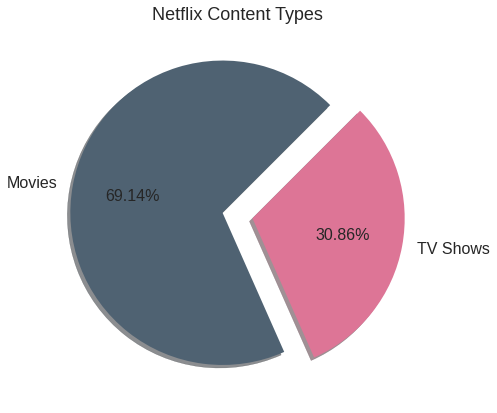

In [ ]:
# pie chart for content type
labels=['Movies','TV Shows']
colors = ['#4F6272','#DD7596']
plt.figure(figsize=(10,7))
plt.pie(df['type'].value_counts(), labels=labels, colors=colors, autopct = '%0.2f%%', startangle = 45, explode = [0.1,0.1], shadow = True, textprops={'fontsize': 16})
plt.title('Netflix Content Types', fontsize = 18)
plt.show()

Majority of content on Netflix are movies.

There are about 69% movies and 31% TV shows on Netflix.

**Content Added Over The Years**

In [ ]:
# content added over the years
year_added = df['year_added'].value_counts().iloc[0:21]
year_added_df = pd.DataFrame(year_added)
year_added_df.reset_index(inplace = True)
year_added_df.rename(columns = {'index':'year','year_added':'count'},inplace = True)
year_added_df = year_added_df.sort_values(by='year')

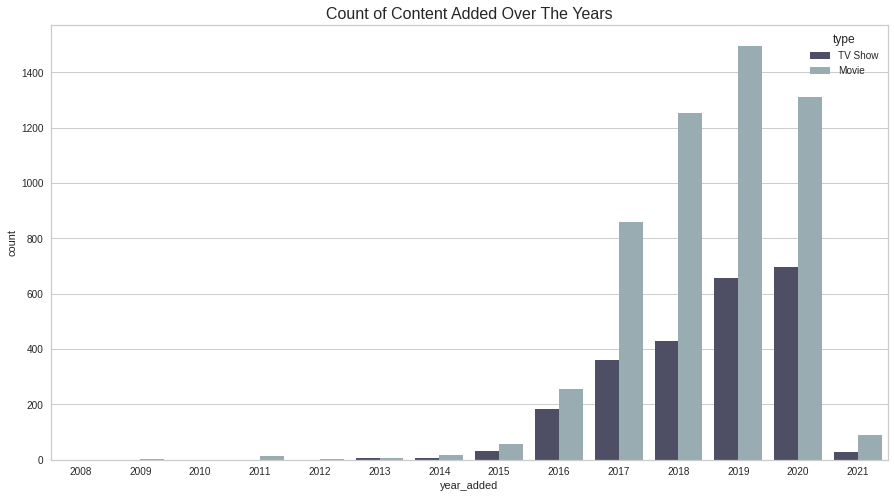

In [ ]:
# plotting content added over the years
plt.figure(figsize=(15,8))
sns.countplot(x=df['year_added'],palette="bone",order=year_added_df['year'],hue=df['type'])
plt.title('Count of Content Added Over The Years', fontsize=16)
plt.show()

Large number of TV Shows and Movies got added in the year 2019 and 2020

Netflix achieved its highest peak at year 2019 with most number of content added.

Limited amount of data is available for the year 2021.

**Content Added Month Wise**

In [ ]:
# creating df to store months and counts
months_df = pd.DataFrame(df.month_added.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'month', 'month_added':'count'}, inplace=True)

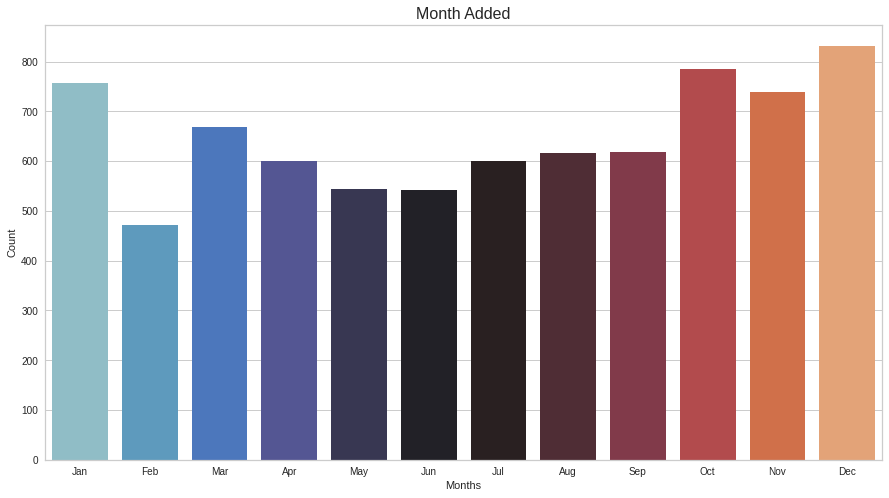

In [ ]:
# plotting month added 
plt.figure(figsize = (15,8))
sns.barplot(x='month',y='count',data=months_df,palette="icefire")
plt.title('Month Added',fontsize=16)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

Most of the content is added on the platform during the winter months

After many content releases during October, November, December and January, the releases on the platform cools down in February.

**Countries With Most Of The Content**

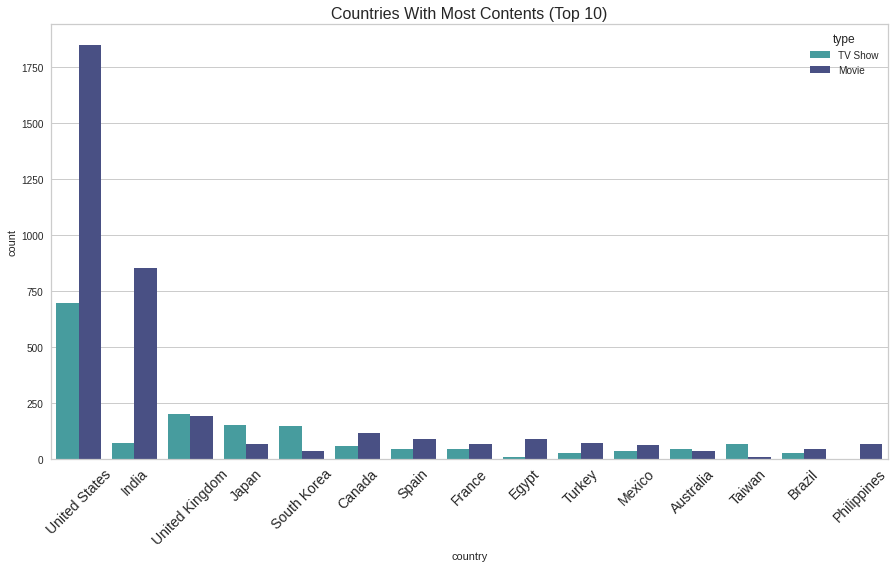

In [ ]:
# plotting top 10 countries with most content
country = df[df['country'] != 'Not Mentioned']
plt.figure(figsize=(15,8))
sns.countplot(x=country['country'],palette="mako_r",order=country['country'].value_counts().index[0:15],hue=df['type'])
plt.title('Countries With Most Contents (Top 10)', fontsize=16)
plt.xticks(rotation=45,fontsize=14)
plt.show()

United States produces highest number of Movies and TV Shows followed by India.

In India, Movies count are very high compared to their TV Shows.

**Content Rating**

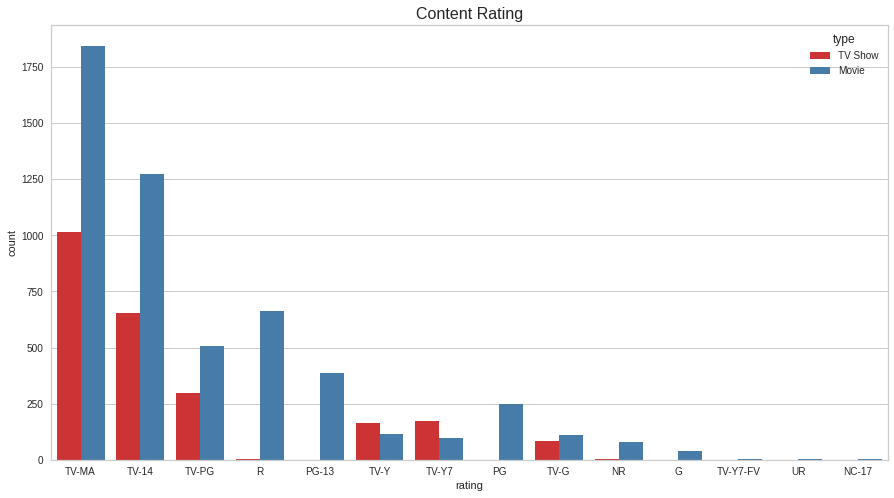

In [ ]:
# plotting content rating with their type
plt.figure(figsize=(15,8))
sns.countplot(x=df['rating'],palette="Set1",order=df['rating'].value_counts().index[0:],hue=df['type'])
plt.title('Content Rating', fontsize=16)
plt.show()

Large number of content are TV-MA rated, this indicates mature content is popular on Netflix.

TV-14 and TV-PG rated content are TV Shows and Movies popular among Teenagers

Third largest is the very popular 'R' rating. An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17

**Content Released Past 20 Years**

In [ ]:
# creating df to store release year and counts
release_year = df['release_year'].value_counts().iloc[0:21]
release_year_df = pd.DataFrame(release_year)
release_year_df.reset_index(inplace = True)
release_year_df.rename(columns = {'index':'year','release_year':'count'},inplace = True)
release_year_df = release_year_df.sort_values(by='year')

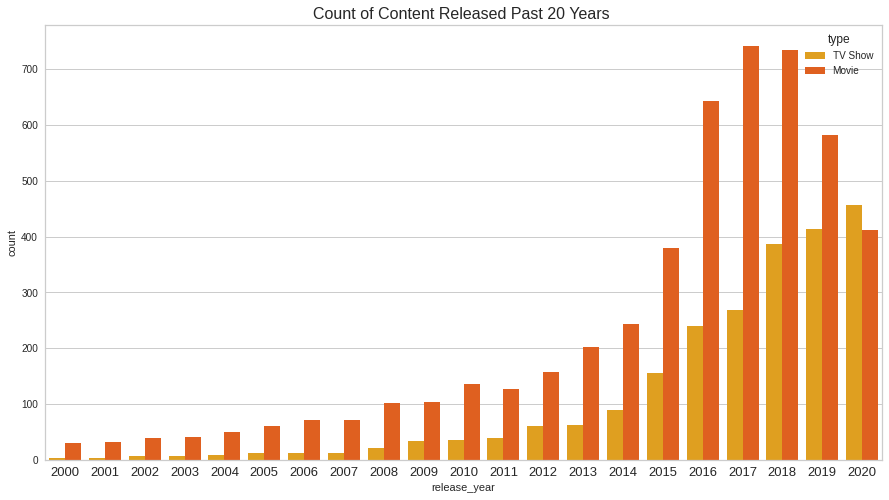

In [ ]:
# plotting content released past 20 years 
plt.figure(figsize=(15,8))
sns.countplot(x=df['release_year'],palette="autumn_r",order=release_year_df['year'],hue=df['type'])
plt.title('Count of Content Released Past 20 Years ', fontsize=16)
plt.xticks(fontsize=13)
plt.show()

Immense amount of TV Shows and Movies were released over past 5 years.

TV Shows and Movies are following on consistent ratio among them over the years.

**Directors with Most Number of TV Shows and Movies**

In [ ]:
# creating df to store director names and their content counts
director = df['director'].value_counts().iloc[1:16]
director_df = pd.DataFrame(director)
director_df.reset_index(inplace = True)
director_df.rename(columns={'index':'director','director':'count'},inplace = True)

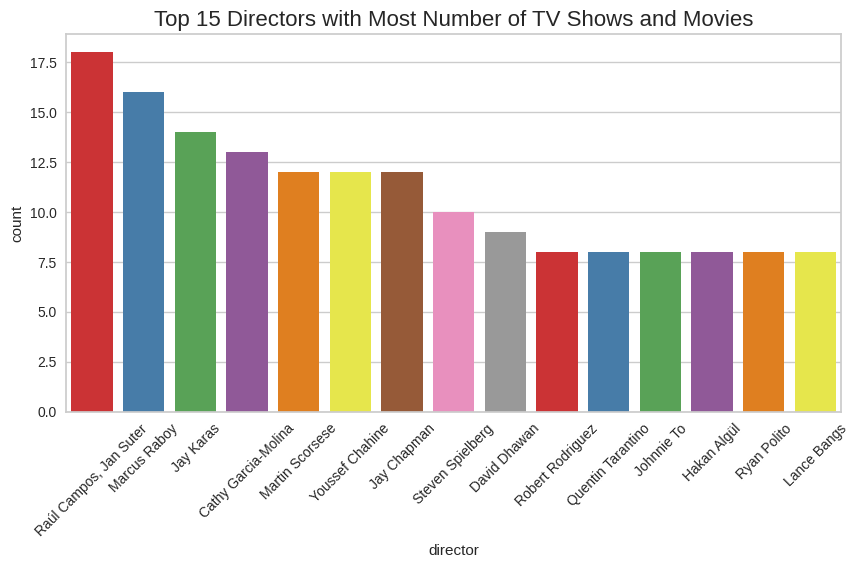

In [ ]:
# plotting top 15 directors with most number of content
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(x=director_df['director'],y=director_df['count'],palette="Set1")
plt.title('Top 15 Directors with Most Number of TV Shows and Movies', fontsize=16)
plt.xticks(rotation=45)
plt.show()

Raul Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Martin Scorsese are the top 5 directors with most content on Netflix.

**TV Shows Distribution**

In [ ]:
# creating df to store tv shows seasons and their counts
tv_shows = df[df['type'] == 'TV Show']
tv_shows_duration = tv_shows['duration'].value_counts().iloc[0:10]
tv_shows_duration_df = pd.DataFrame(tv_shows_duration)
tv_shows_duration_df.reset_index(inplace = True)
tv_shows_duration_df.rename(columns = {'index':'seasons','duration':'count'},inplace = True)
tv_shows_duration_df = tv_shows_duration_df.sort_values(by='count',ascending=False)

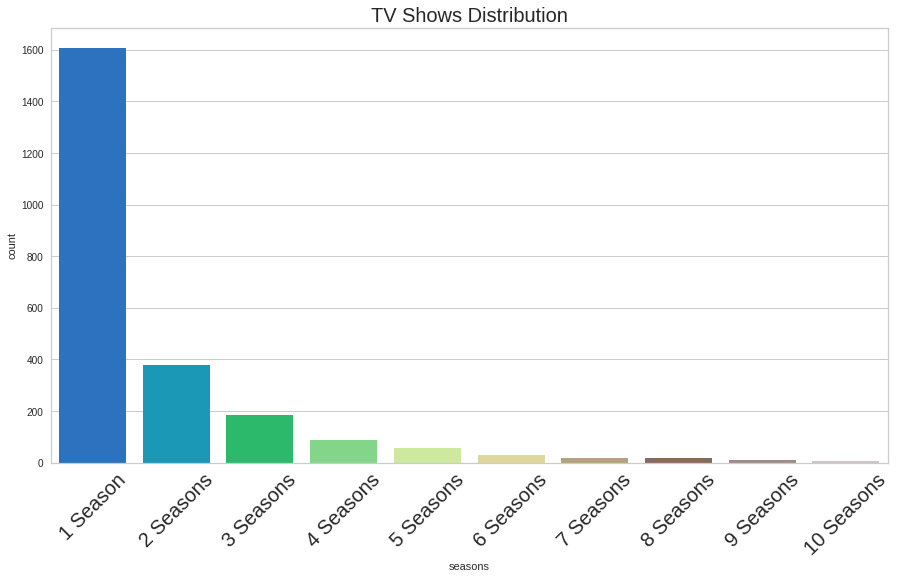

In [ ]:
# plotting tv shows distribution
plt.figure(figsize=(15,8))
sns.barplot(x=tv_shows_duration_df['seasons'],y=tv_shows_duration_df['count'],palette="terrain")
plt.title('TV Shows Distribution', fontsize=20)
plt.xticks(rotation=45,fontsize=20)
plt.show()

Most of the TV Shows are only of 1 season.
Very few TV Shows have more than 5 seasons.

**Duration Of Movies**

In [ ]:
# creating df to store movie count and duration
movie = df[df['type'] == 'Movie']
movie_duration_df = movie['duration'].reset_index()
movie_duration_df.rename(columns = {'index':'count','count':'duration'},inplace = True)

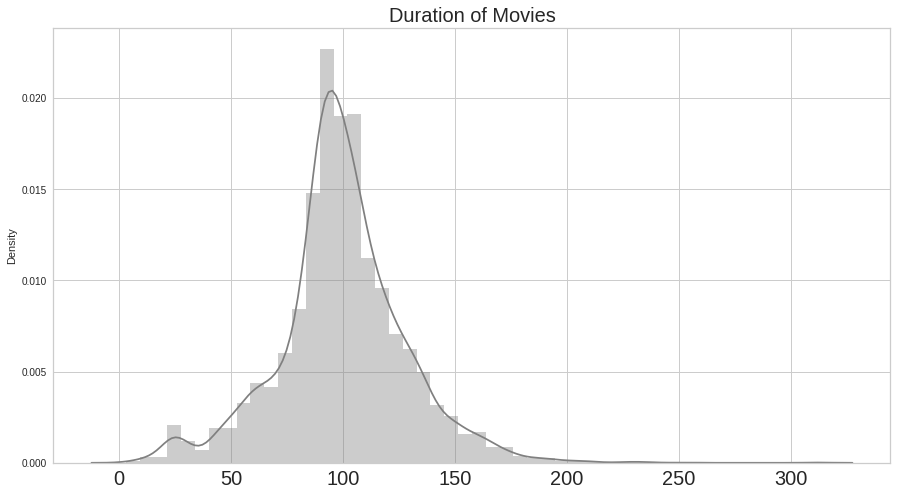

In [ ]:
# plotting duration of movies
plt.figure(figsize=(15,8))
sns.distplot(movie_duration_df['duration'].str.extract('(\d+)'),color='grey')
plt.title('Duration of Movies',fontsize=20)
plt.xticks(fontsize=20)
plt.show()

# Data Preprocessing

Categorical features for clustering - title, director, cast, country, listed_in, description

In [ ]:
# selecting categorical columns for clustering
clustering_columns = df[['title','director','cast','country','listed_in','description']]
clustering_df = (df['title'] +' '+ df['director'] +' '+ df['cast'] +' '+ df['country'] +' '+ df['listed_in'] +' '+ df['description'])
clustering_df = clustering_df.str.lower()

In [ ]:
# one hot encodes list of columns and concatenates them to the original df
def one_hot_encode(df, columns):
  concat_df = pd.concat([pd.get_dummies(df[col], drop_first=True, prefix=col) for col in columns], axis=1)
  one_hot_enc_cols = concat_df.columns
  return concat_df, one_hot_enc_cols
  
categorical_cols = clustering_columns.select_dtypes(include='object')
df_one_hot, _ = one_hot_encode(df, categorical_cols)

umap_embedding = (umap.UMAP(metric='euclidean', n_neighbors=200, n_components=10, random_state = 101, ).fit_transform(df_one_hot))

In [ ]:
# creating a dataframe
umap_df = pd.DataFrame(umap_embedding)
X_scaled = StandardScaler().fit_transform(umap_df)
X_scaled = normalize(X_scaled)
X_scaled

array([[ 0.19173263, -0.45309857,  0.11230246, ...,  0.16260141,
        -0.45562172,  0.35560122],
       [-0.44599402, -0.24851029,  0.36085424, ..., -0.2640034 ,
        -0.3548717 ,  0.04269705],
       [-0.32177186, -0.27167428,  0.24724506, ..., -0.03826569,
        -0.42125937,  0.03814945],
       ...,
       [ 0.44469786, -0.4014626 ,  0.08208258, ...,  0.26272717,
        -0.4272871 ,  0.35162875],
       [ 0.28300336, -0.42490748,  0.12878503, ...,  0.19470924,
        -0.43761367,  0.41322824],
       [ 0.33177128, -0.34188098,  0.45182732, ...,  0.07505857,
        -0.20626776,  0.54153043]], dtype=float32)

# Hierarchical Clustering

Hierarchical clustering separates data into groups based on some measure of similarity, finding a way to measure how they’re alike and different, and further narrowing down the data.

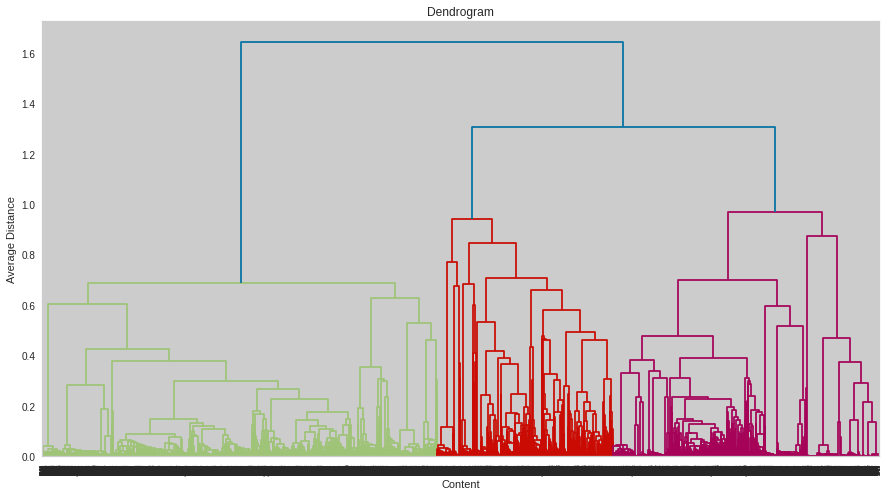

In [ ]:
# Using the dendogram to find the optimal number of clusters
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Average Distance')
plt.show()

Dendrogram shows that 3 clusters would be suitable for clustering this data.

In [ ]:
h_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_h_clustering = h_clustering.fit_predict(X_scaled)

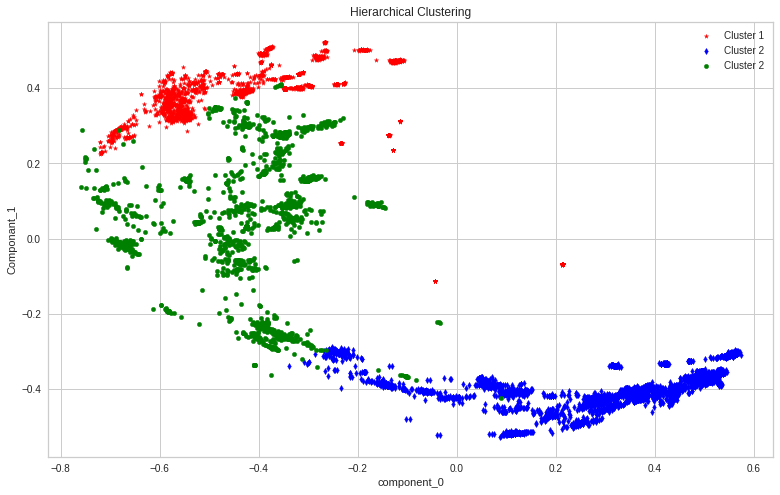

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(13,8))
plt.scatter(X_scaled[y_h_clustering == 0, 0], X_scaled[y_h_clustering == 0, 1], s = 20, c = 'red', label = 'Cluster 1', marker = '*')
plt.scatter(X_scaled[y_h_clustering == 1, 0], X_scaled[y_h_clustering == 1, 1], s = 20, c = 'blue', label = 'Cluster 2', marker  = 'd')
plt.scatter(X_scaled[y_h_clustering == 2, 0], X_scaled[y_h_clustering == 2, 1], s = 20, c = 'green', label = 'Cluster 2')
plt.title('Hierarchical Clustering')
plt.xlabel('component_0')
plt.ylabel('Componant_1')
plt.legend()
plt.show()

Most of the Movies are around 90 to 120 minutes.